In [ ]:
"""
This notebook contains Exploratory Data Analysis on weather data for all instances where a wildfire happened
"""

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
pd.set_option('display.max_columns', None) 

In [81]:
training_df=pd.read_csv('../Datasets/training_df_raw.csv')
training_df

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,time,fire
0,2020-01-02 09:00:00+00:00,10.460000,95.428820,9.7600,9.326071,0.0,0.0,0.0,0.0,0.0,1012.4,1012.03436,3.900000,4.0,0.0,1.0,0.000000,0.057978,7.421590,12.229406,112.833694,137.38599,11.879999,10.760000,13.110001,14.010000,21.910000,0.275,0.318,0.195,0.026,09:00:00,1
1,2020-01-02 09:00:00+00:00,10.453500,95.428590,9.7535,9.317741,0.0,0.0,0.0,0.0,0.0,1012.4,1011.91230,3.900000,4.0,0.0,1.0,0.000000,0.057956,7.421590,12.229406,112.833694,137.38599,11.879999,10.753500,13.103500,14.003500,21.903500,0.275,0.318,0.195,0.026,09:00:00,1
2,2020-01-02 09:00:00+00:00,10.414500,95.427210,9.7145,9.267784,0.0,0.0,0.0,0.0,0.0,1012.4,1011.18120,3.900000,4.0,0.0,1.0,0.000000,0.057823,7.421590,12.229406,112.833694,137.38599,11.879999,10.714500,13.064501,13.964500,21.864500,0.275,0.318,0.195,0.026,09:00:00,1
3,2020-01-02 09:00:00+00:00,9.223500,99.663920,9.1735,8.143780,0.0,0.0,0.0,0.0,0.0,1012.5,1010.78680,2.700000,3.0,0.0,0.0,0.000000,0.003924,5.937272,11.885453,75.963730,125.13428,13.320000,10.423500,12.823500,13.723500,21.923500,0.273,0.324,0.201,0.020,09:00:00,1
4,2020-01-02 09:00:00+00:00,9.243000,99.663990,9.1930,8.168585,0.0,0.0,0.0,0.0,0.0,1012.5,1011.15370,2.700000,3.0,0.0,0.0,0.000000,0.003929,5.937272,11.885453,75.963730,125.13428,13.320000,10.443000,12.842999,13.743000,21.942999,0.273,0.324,0.201,0.020,09:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113891,2024-07-18 23:00:00+00:00,28.476500,26.921050,7.6265,26.616827,0.0,0.0,0.0,NaN,1.0,1015.9,827.84717,32.100002,0.0,41.0,25.0,0.590094,2.840295,14.400000,18.440998,233.130020,231.34016,38.160000,41.726498,30.776499,26.726500,18.426498,0.042,0.134,0.192,0.235,23:00:00,0
113892,2024-07-09 03:00:00+00:00,25.435000,36.749325,9.5850,24.854360,0.0,0.0,0.0,0.0,0.0,1009.1,957.93960,0.000000,0.0,0.0,0.0,0.062706,2.056562,3.259939,8.825508,276.340100,348.23172,17.640000,32.185000,28.734999,23.435000,17.535000,0.135,0.170,0.229,0.293,03:00:00,0
113893,2024-04-12 17:00:00+00:00,13.914001,82.397710,10.9640,13.423975,0.0,0.0,0.0,0.0,3.0,1012.1,965.82623,94.500000,100.0,0.0,15.0,0.216334,0.280129,5.411986,6.569383,176.186000,170.53775,18.720000,14.164001,13.364000,12.314000,12.314000,0.231,0.314,0.330,0.342,17:00:00,0
113894,2024-07-29 07:00:00+00:00,7.604000,52.525845,-1.4960,4.411881,0.0,0.0,0.0,NaN,0.0,1017.0,741.41956,0.000000,0.0,0.0,0.0,0.013543,0.496763,5.815978,13.493999,338.198520,313.91916,18.720000,10.654000,14.604001,13.604000,7.954000,0.270,0.296,0.347,0.392,07:00:00,0


In [82]:
training_df.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'time', 'fire'],
      dtype='object')

In [83]:
training_df.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,fire
count,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,105221.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000,113896.000000
mean,19.414469,40.039886,2.605195,17.203324,0.005462,0.005391,0.000050,0.000073,0.612822,1014.628636,914.386330,7.589053,3.278500,2.799010,10.270598,0.210101,1.691340,8.501795,12.877965,186.578840,198.530211,24.539068,20.940333,21.649098,20.701295,18.661846,0.115931,0.171158,0.185185,0.228846,0.500000
std,8.146962,24.460866,7.752407,8.861255,0.108089,0.106962,0.007049,0.003157,4.795263,4.198589,77.395363,17.649626,14.774612,11.832744,25.625812,0.260791,1.370733,5.570047,8.863691,107.822598,103.968381,14.839873,9.256852,6.827350,5.299943,4.654933,0.080307,0.069254,0.086867,0.095839,0.500002
min,-8.743500,1.853301,-35.182000,-14.721371,0.000000,0.000000,0.000000,0.000000,0.000000,997.000000,690.956400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.682054,0.462053,1.080000,-4.087500,-1.343500,1.486000,1.926000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.215500,20.267322,-2.290000,10.494376,0.000000,0.000000,0.000000,0.000000,0.000000,1012.000000,850.043200,0.000000,0.000000,0.000000,0.000000,0.017415,0.672519,4.394360,6.287130,81.253920,105.923958,12.959999,14.063499,16.849500,16.937500,15.763875,0.058000,0.138000,0.132000,0.166000,0.000000
50%,18.753500,33.761568,2.676500,16.697347,0.000000,0.000000,0.000000,0.000000,0.000000,1014.500000,923.799875,0.000000,0.000000,0.000000,0.000000,0.066737,1.351249,7.172949,10.966713,200.556120,216.869980,21.240000,19.994749,20.858750,20.239750,18.230500,0.111000,0.157000,0.183000,0.212000,0.500000
75%,24.864498,55.419906,7.952125,22.979637,0.000000,0.000000,0.000000,0.000000,0.000000,1017.100000,983.493325,4.500000,0.000000,0.000000,0.000000,0.377449,2.356180,11.440978,17.283749,276.340100,283.431030,33.480000,26.335499,26.842499,24.431626,21.967500,0.139000,0.192000,0.248000,0.298000,1.000000
max,48.416000,100.000000,25.239500,50.394592,8.500000,8.500000,2.100000,0.300000,75.000000,1037.700000,1037.884500,100.000000,100.000000,100.000000,100.000000,1.136112,10.908269,58.608180,89.515580,360.000000,360.000000,146.520000,56.898500,44.453503,40.609997,33.660000,0.505000,0.499000,0.492000,0.503000,1.000000


In [84]:
training_df.isna().sum()

date                                0
temperature_2m                      0
relative_humidity_2m                0
dew_point_2m                        0
apparent_temperature                0
precipitation                       0
rain                                0
snowfall                            0
snow_depth                       8675
weather_code                        0
pressure_msl                        0
surface_pressure                    0
cloud_cover                         0
cloud_cover_low                     0
cloud_cover_mid                     0
cloud_cover_high                    0
et0_fao_evapotranspiration          0
vapour_pressure_deficit             0
wind_speed_10m                      0
wind_speed_100m                     0
wind_direction_10m                  0
wind_direction_100m                 0
wind_gusts_10m                      0
soil_temperature_0_to_7cm           0
soil_temperature_7_to_28cm          0
soil_temperature_28_to_100cm        0
soil_tempera

In [85]:
training_df['snow_depth'].describe()

count    105221.000000
mean          0.000073
std           0.003157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.300000
Name: snow_depth, dtype: float64

In [86]:
training_df['snow_depth'].quantile(0.99)

0.0

In [87]:
# The above 2 cells indicates that snow_depth has almost every value as 0. So I will replace the Nulls with 0
training_df['snow_depth'].fillna(0,inplace=True)

<Axes: xlabel='month', ylabel='temperature_2m'>

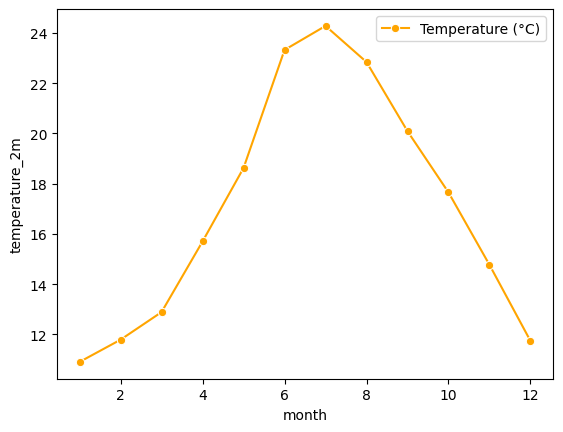

In [96]:
# plot to check average temperature across the months
training_df['date']=pd.to_datetime(training_df['date'])
training_df['month']=training_df['date'].dt.month
temp_seasonality_df=training_df.groupby('month').agg({'temperature_2m':'mean','precipitation':'mean','snowfall':'mean'}).reset_index().copy()
temp_seasonality_df
sns.lineplot(data=temp_seasonality_df, x='month', y='temperature_2m', marker='o', label='Temperature (°C)', color='orange')

C:\Users\Olan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


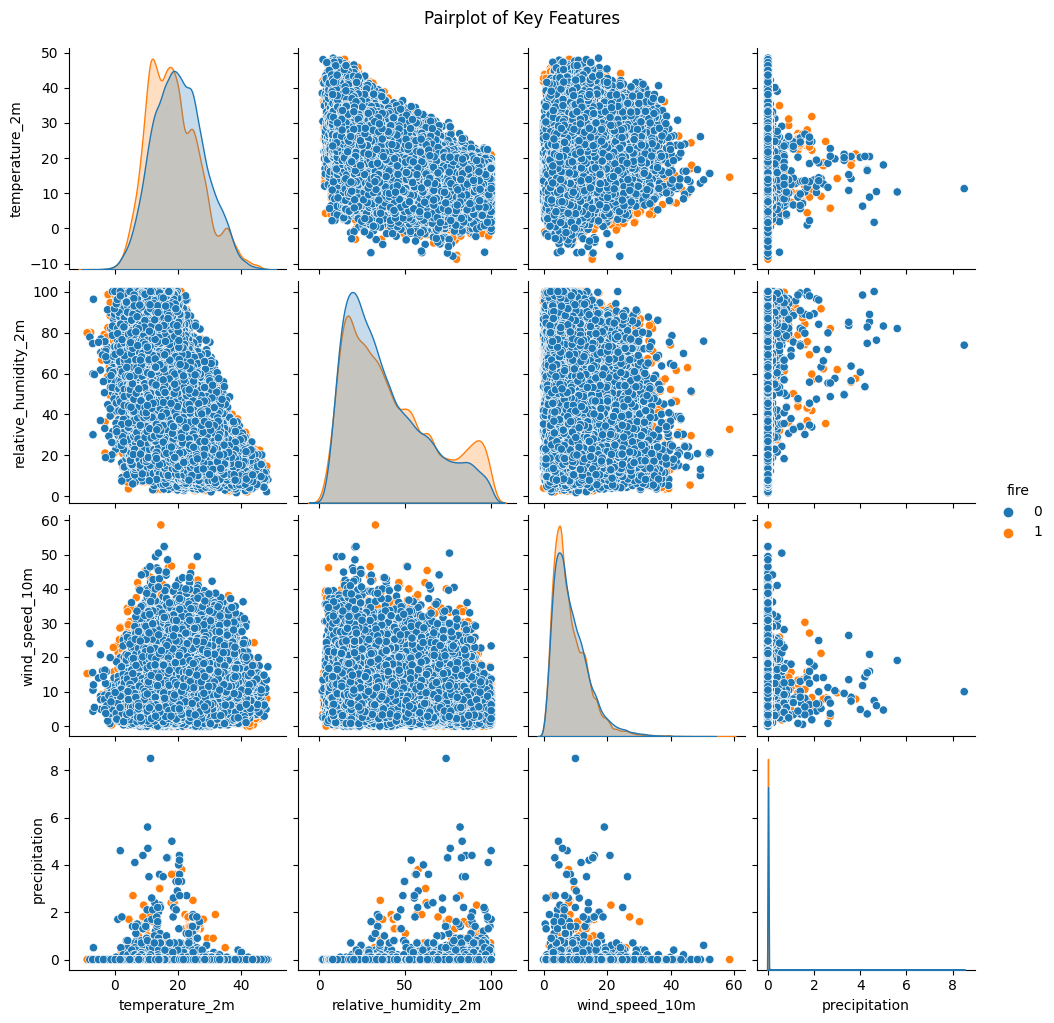

In [52]:
sns.pairplot(training_df, hue='fire', vars=['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'precipitation'])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

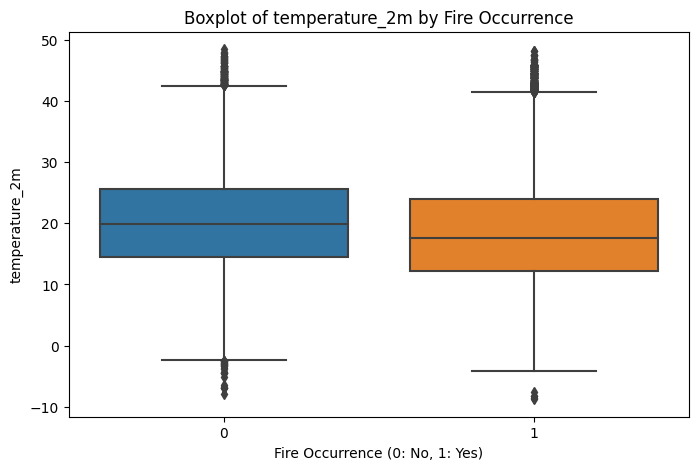

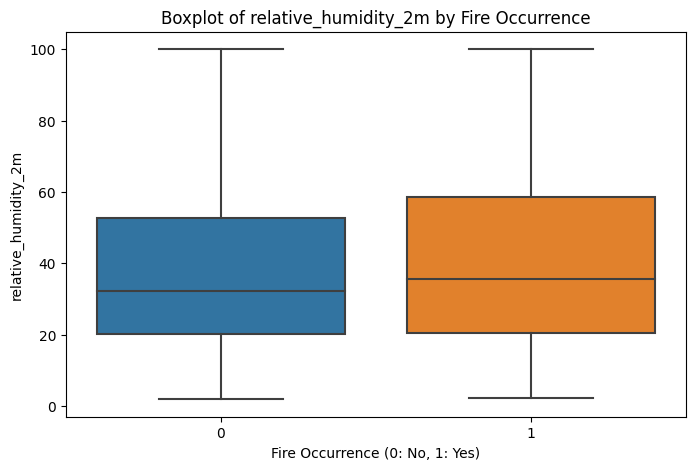

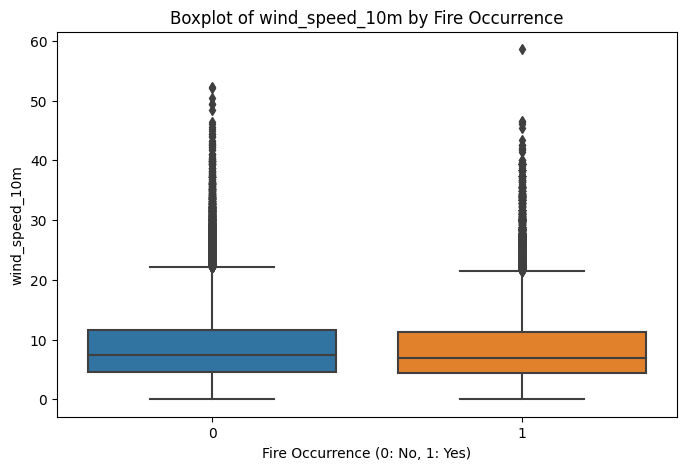

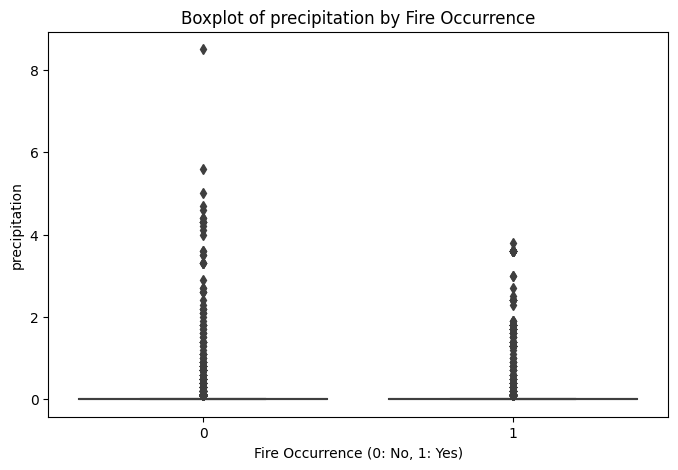

In [54]:
features_to_plot = ['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'precipitation']

for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='fire', y=feature, data=training_df)
    plt.title(f'Boxplot of {feature} by Fire Occurrence')
    plt.xlabel('Fire Occurrence (0: No, 1: Yes)')
    plt.ylabel(feature)
    plt.show()

In [100]:
len(training_df[training_df['fire']==0])

56948

Text(0.5, 1.0, 'Correlation Heatmap of Weather and Fire Variables')

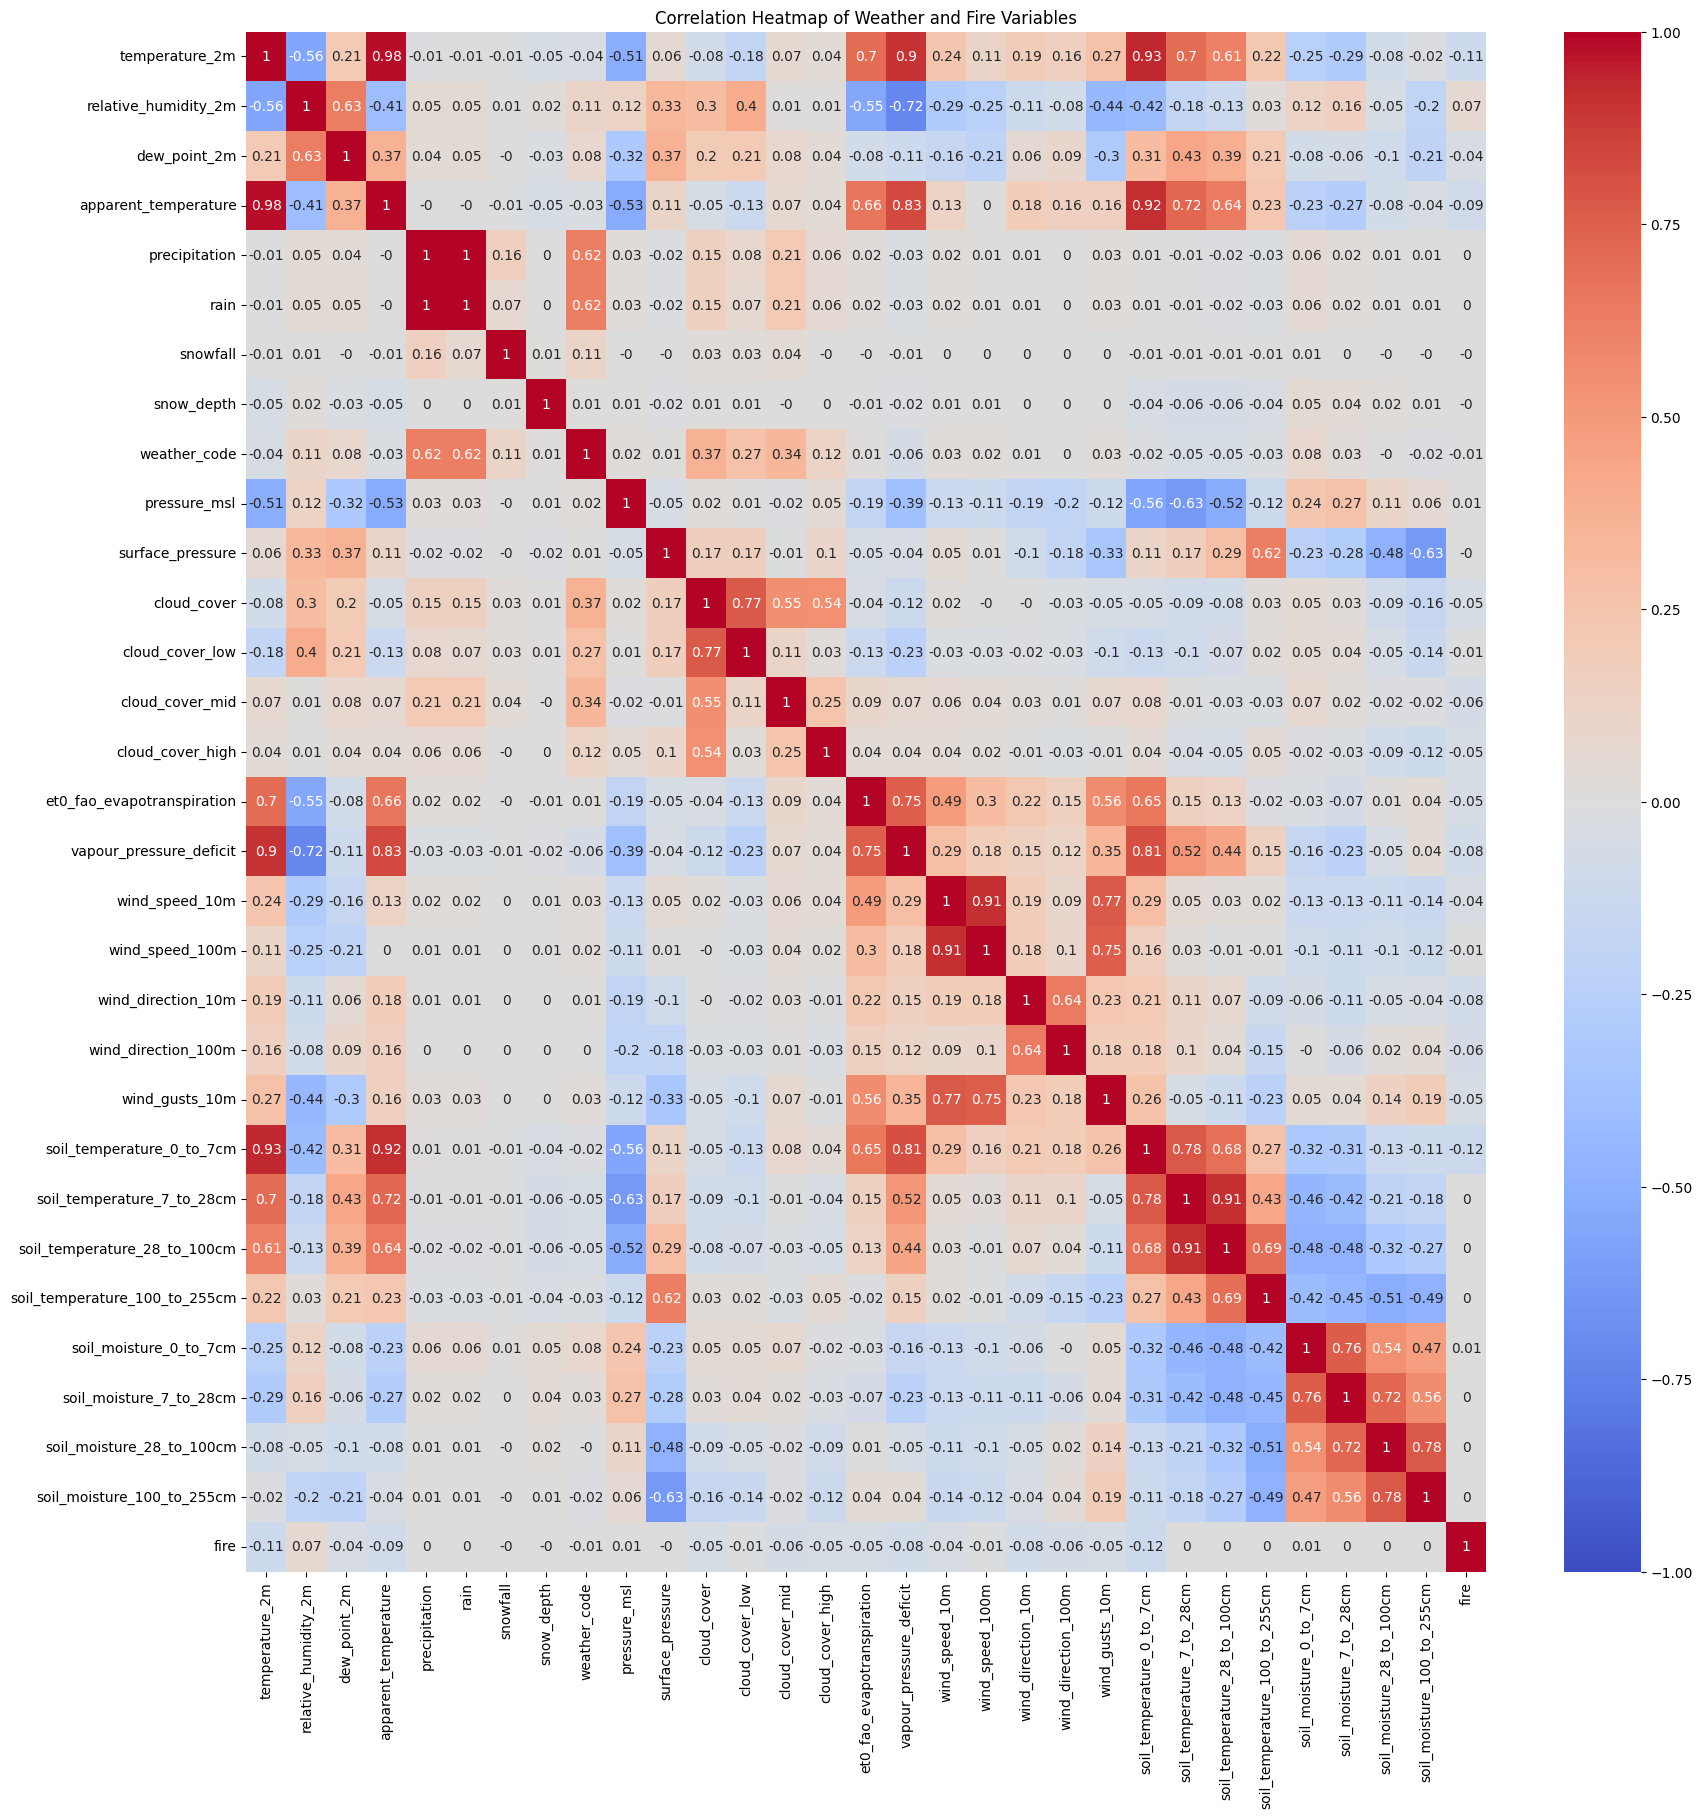

In [55]:
"""Heat map between all features"""
corr_matrix = training_df.corr().round(2)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Weather and Fire Variables')